<a href="https://colab.research.google.com/github/Suvraneel/fcc-machine-learning-with-python/blob/fcc-practice/stockEpsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [2]:
!pip install nsepy

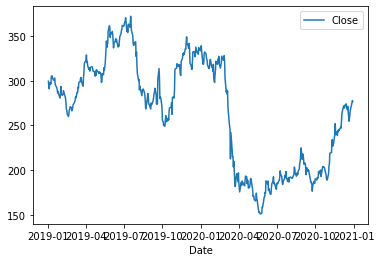

In [21]:
from nsepy import get_history
from datetime import date
data = get_history(symbol="SBIN", start=date(2019,1,1), end=date(2020,12,30))
data[['Close']].plot()

In [23]:
from datetime import date
from nsepy import get_history
sbin = get_history(symbol='SBIN',
                   start=date(2019,1,1),
                   end=date(2020,12,30))
sbin.head(15)
dataset_train = pd.DataFrame(sbin)
dataset_train.head(15)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,SBIN,EQ,295.90,297.50,300.70,293.85,300.70,299.60,296.77,11837127,3.512877e+14,69723,1668134,0.1409
2019-01-02,SBIN,EQ,299.60,299.10,302.50,293.10,293.80,293.90,298.20,25559853,7.622010e+14,162196,7019907,0.2746
2019-01-03,SBIN,EQ,293.90,295.00,295.55,290.10,291.05,291.10,292.87,17548347,5.139324e+14,110626,6361787,0.3625
2019-01-04,SBIN,EQ,291.10,292.10,299.00,291.50,297.30,297.65,296.18,19514041,5.779686e+14,142962,4963982,0.2544
2019-01-07,SBIN,EQ,297.65,301.05,301.50,295.20,296.55,296.30,298.25,14579399,4.348321e+14,113554,4817960,0.3305
2019-01-08,SBIN,EQ,296.30,295.80,306.00,294.75,305.50,305.30,301.96,22949961,6.929908e+14,161941,8532454,0.3718
2019-01-09,SBIN,EQ,305.30,306.00,307.10,300.75,304.75,305.30,304.37,21109911,6.425242e+14,153567,5956634,0.2822
2019-01-10,SBIN,EQ,305.30,305.10,307.50,303.50,305.40,305.55,305.60,16295468,4.979912e+14,105369,3670150,0.2252
2019-01-11,SBIN,EQ,305.55,305.40,306.20,300.95,301.65,302.75,303.57,12702551,3.856075e+14,113356,4877179,0.3840


In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

In [24]:
# s = "/content/drive/MyDrive/nse_data_legacy.csv"
# dataset_train = pd.read_csv(s)
dataset_train = dataset_train.drop('Series', 1)
training_set = dataset_train.iloc[:, 1:2].values

In [25]:
print(dataset_train.shape)
dataset_train.head(15)

(496, 13)


,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2019-01-01,SBIN,295.90,297.50,300.70,293.85,300.70,299.60,296.77,11837127,3.512877e+14,69723,1668134,0.1409
2019-01-02,SBIN,299.60,299.10,302.50,293.10,293.80,293.90,298.20,25559853,7.622010e+14,162196,7019907,0.2746
2019-01-03,SBIN,293.90,295.00,295.55,290.10,291.05,291.10,292.87,17548347,5.139324e+14,110626,6361787,0.3625
2019-01-04,SBIN,291.10,292.10,299.00,291.50,297.30,297.65,296.18,19514041,5.779686e+14,142962,4963982,0.2544
2019-01-07,SBIN,297.65,301.05,301.50,295.20,296.55,296.30,298.25,14579399,4.348321e+14,113554,4817960,0.3305
2019-01-08,SBIN,296.30,295.80,306.00,294.75,305.50,305.30,301.96,22949961,6.929908e+14,161941,8532454,0.3718
2019-01-09,SBIN,305.30,306.00,307.10,300.75,304.75,305.30,304.37,21109911,6.425242e+14,153567,5956634,0.2822
2019-01-10,SBIN,305.30,305.10,307.50,303.50,305.40,305.55,305.60,16295468,4.979912e+14,105369,3670150,0.2252
2019-01-11,SBIN,305.55,305.40,306.20,300.95,301.65,302.75,303.57,12702551,3.856075e+14,113356,4877179,0.3840


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
X_train = []
y_train = []
for i in range(60, 496):
    X_train.append(training_set_scaled[i-60:i, 0])      # creating numpy array for keras
    y_train.append(training_set_scaled[i, 0])           # ds sliding win
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor
# # Init, fit, test Lasso Regressor
# forest = RandomForestRegressor()
# _ = forest.fit(X_train, y_train)
# forest.score(X_test, y_test)
# # Init the transformer
# rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

# # Fit to the training data
# _ = rfe.fit(X_train, y_train)
# X_train.loc[:, rfe.support_]

# from sklearn import metrics
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


# Do not run


# from sklearn.feature_selection import RFE
# from sklearn.svm import SVC,SVR
# svc = SVC(C=1, kernel='linear') 
# rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
# rfe.fit(X_train, y_train)

Building the LSTM  
In order to build the LSTM, we need to import a couple of modules from Keras:

    Sequential for initializing the neural network
    Dense for adding a densely connected neural network layer
    LSTM for adding the Long Short-Term Memory layer
    Dropout for adding dropout layers that prevent overfitting 

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout  #optional

In [44]:

regressor = Sequential()    # Init Model

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #layer 1

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))     # return = false
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))     #last layer

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')      #adam = mean of sq. error b/w actual & predicted values

regressor.fit(X_train, y_train, epochs =60, batch_size = 32) # epoch = 100 #validation_data=None #shuffle=True

Epoch 1/60
14/14 [==============================] - 7s 115ms/step - loss: 0.0859
Epoch 2/60
14/14 [==============================] - 2s 119ms/step - loss: 0.0301
Epoch 3/60
14/14 [==============================] - 2s 116ms/step - loss: 0.0240
Epoch 4/60
14/14 [==============================] - 2s 117ms/step - loss: 0.0191
Epoch 5/60
14/14 [==============================] - 2s 112ms/step - loss: 0.0170
Epoch 6/60
14/14 [==============================] - 2s 114ms/step - loss: 0.0163
Epoch 7/60
14/14 [==============================] - 2s 115ms/step - loss: 0.0168
Epoch 8/60
14/14 [==============================] - 2s 114ms/step - loss: 0.0154
Epoch 9/60
14/14 [==============================] - 2s 117ms/step - loss: 0.0142
Epoch 10/60
14/14 [==============================] - 2s 110ms/step - loss: 0.0123
Epoch 11/60
14/14 [==============================] - 2s 115ms/step - loss: 0.0132
Epoch 12/60
14/14 [==============================] - 2s 113ms/step - loss: 0.0111
Epoch 13/60
14/14 [======

In [45]:
# test set
# dataset_test = pd.read_csv('/content/drive/MyDrive/testdata.csv')
sbin_test = get_history(symbol='SBIN',
                   start=date(2021,1,1),
                   end=date(2021,11,1))   # YYYY/MM/DD
dataset_test = pd.DataFrame(sbin_test)
dataset_test = dataset_test.drop('Series', 1)
real_stock_price = dataset_test.iloc[:, 1:2].values
print(dataset_test.shape)

(206, 13)


In [46]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)  #concat training & test dataset (since prev few day b4 test reqd)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 206):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)                 # reverse scaled views

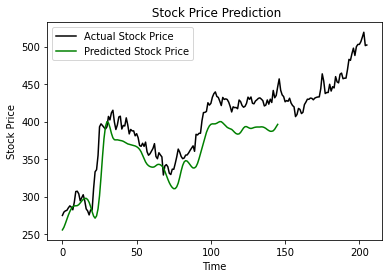

In [47]:
# Plot results
plt.plot(real_stock_price, color = 'black', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()